# <u>Walmart Sales Forecasting <u>
    follow the headings

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
# Reading CSV files relevant to this analysis & ML
data = pd.read_csv("C:/Users/haide/Desktop/Python/Walmart Sales Forecasting/train.csv")
stores = pd.read_csv("C:/Users/haide/Desktop/Python/Walmart Sales Forecasting/stores.csv")
features = pd.read_csv("C:/Users/haide/Desktop/Python/Walmart Sales Forecasting/features.csv")

# Analysis & cleanning

In [3]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [8]:
# filling missing values
features['CPI'].fillna(features['CPI'].median(),inplace=True)
features['Unemployment'].fillna(features['Unemployment'].median(),inplace=True)

In [9]:
features['MarkDown1'].value_counts()

460.73     2
150.46     2
175.64     2
8.62       2
1.50       2
          ..
4599.86    1
3679.59    1
2569.12    1
312.11     1
212.02     1
Name: MarkDown1, Length: 4023, dtype: int64

In [10]:
from pandas.core.ops import flex_arith_method_FRAME
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x<0 else x )
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [11]:
data = pd.merge(data,stores,on='Store',how='left')

In [12]:
data = pd.merge(data,features,on=['Store','Date'],how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


- The errors parameter is set to 'coerce', which means that any invalid dates will be set to NaT (not a time) instead of raising an error.

In [13]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [14]:
#check whether the column IsHoliday_x and IsHoliday_y are same or not
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [15]:
#Since this two columns are same so drop any one column and make another column as IsHoliday
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [16]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

C:\Users\haide\AppData\Local\Temp\ipykernel_12552\235201722.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [17]:
#Outlier Detection and Abnormalities
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()

In [18]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')

In [19]:
store_data.dropna(inplace=True)

In [20]:
data = store_data.copy()

In [21]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)

In [22]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [23]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [24]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

In [25]:
data=data[data['Weekly_Sales']>=0]
data.shape

(374247, 20)

In [26]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

# Plots & Visualizations

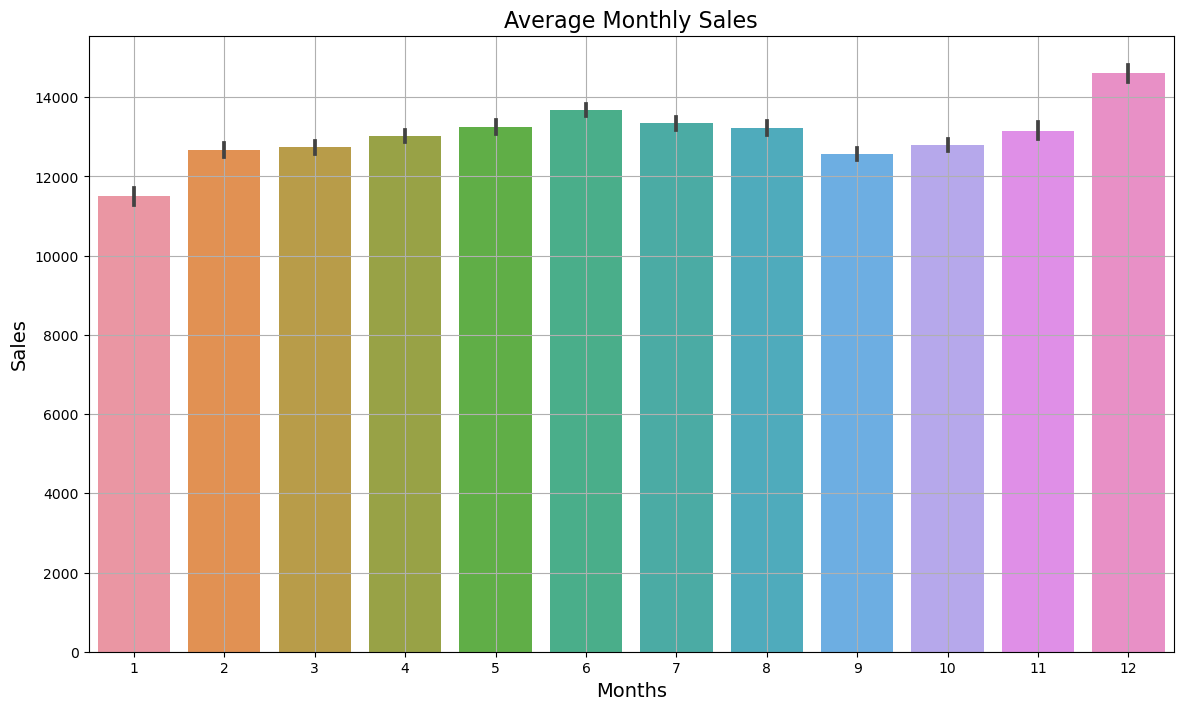

In [27]:
#Average Monthly Sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In [28]:
# Monthly Sales for Each Year
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


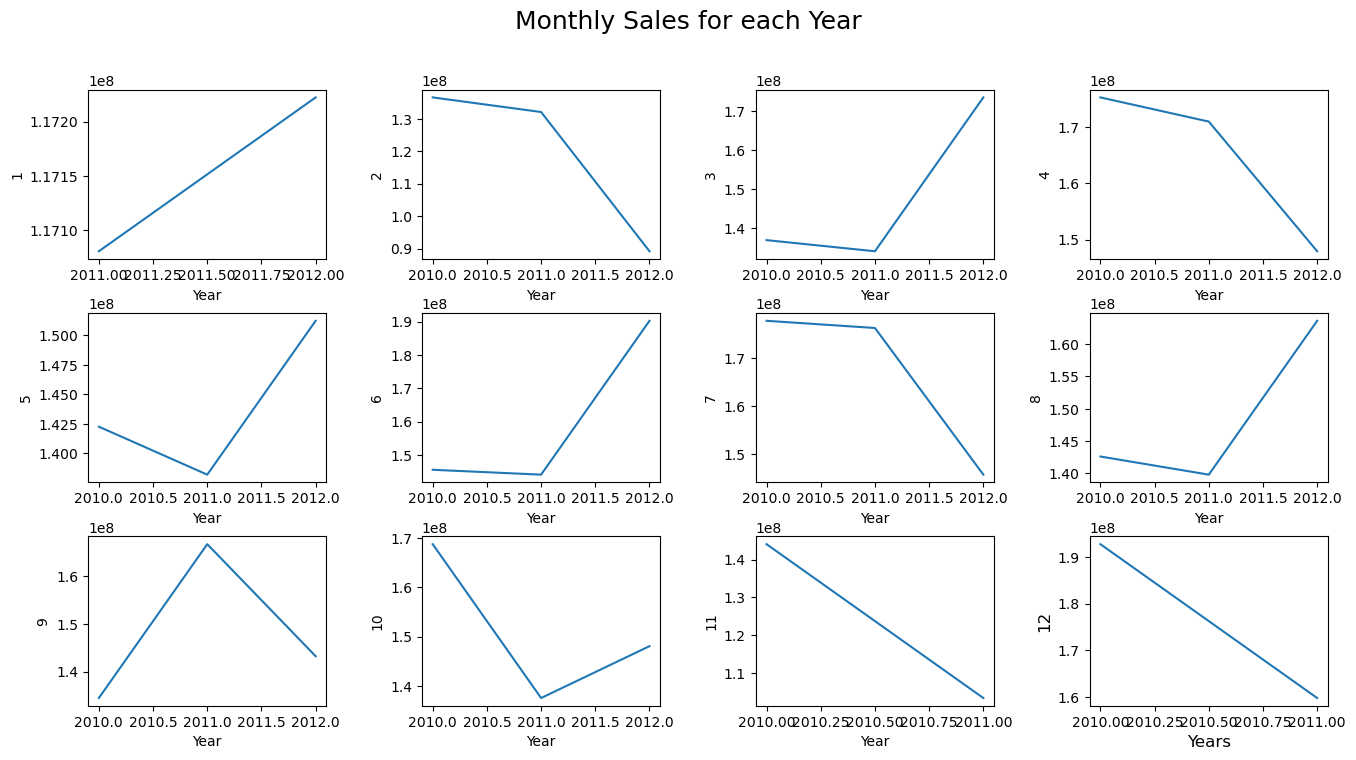

In [29]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.savefig('monthly_sales_every_year.png')
plt.show()

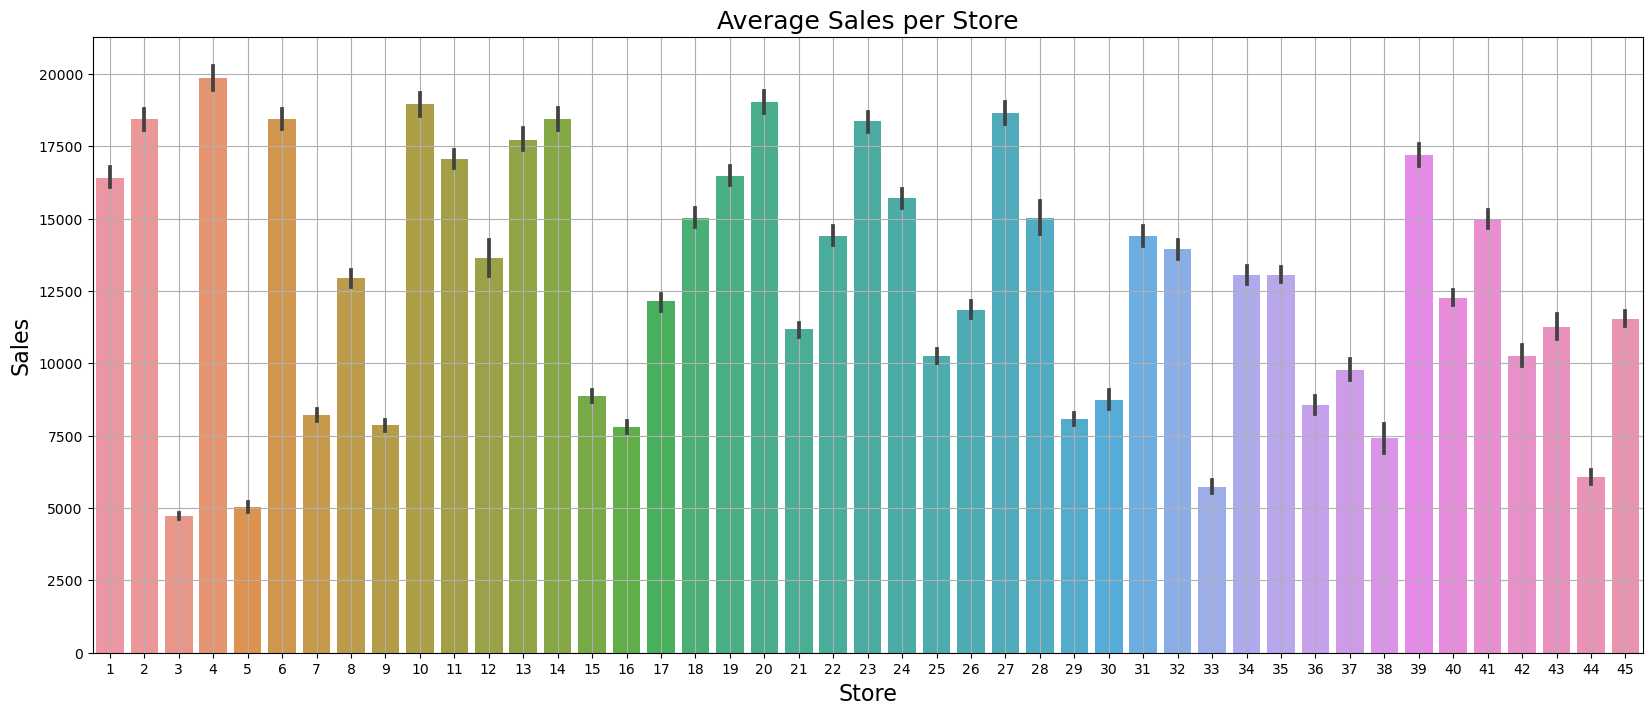

In [30]:
#Average Weekly Sales Store wise
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

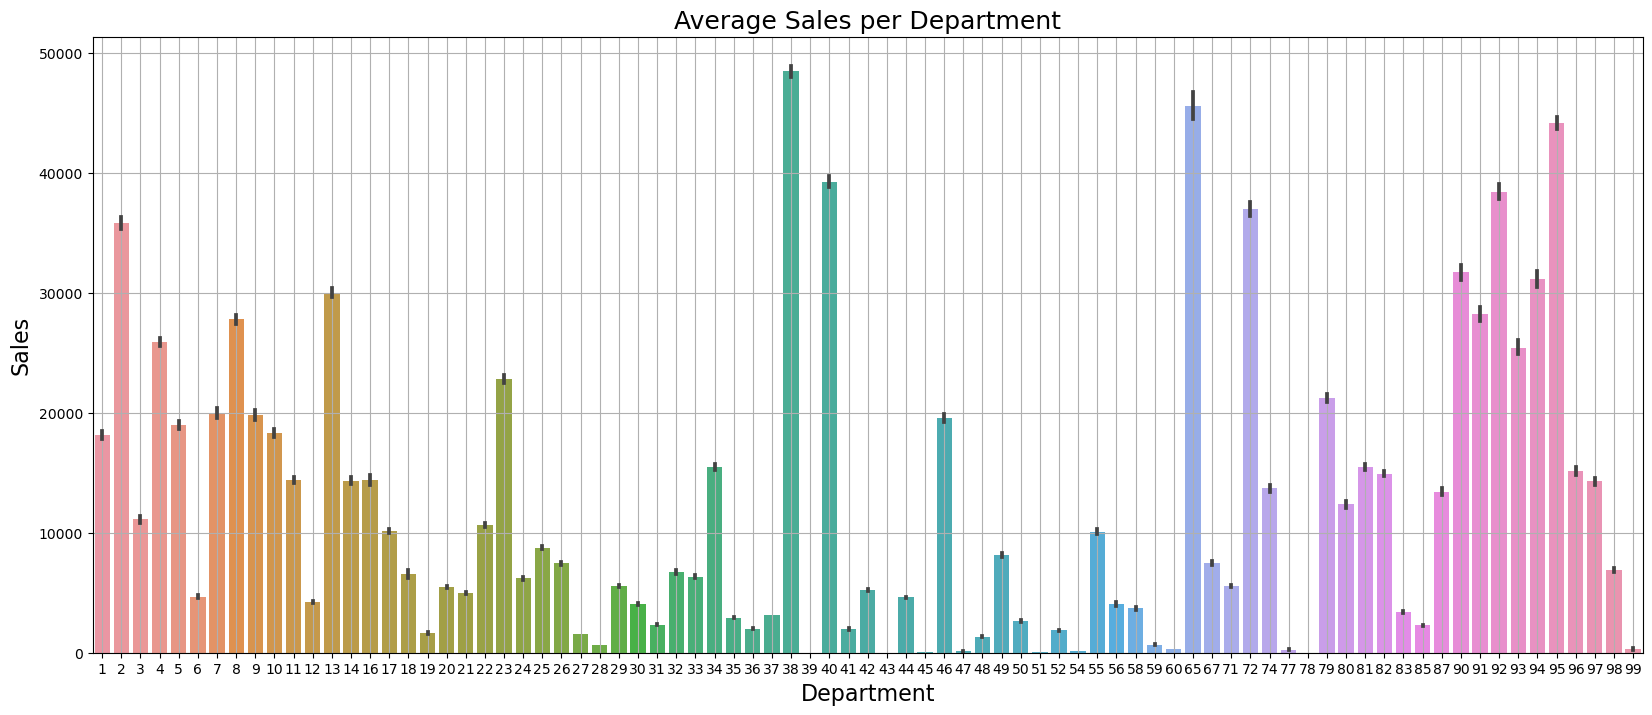

In [31]:
# Average sales per department
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

C:\Users\haide\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


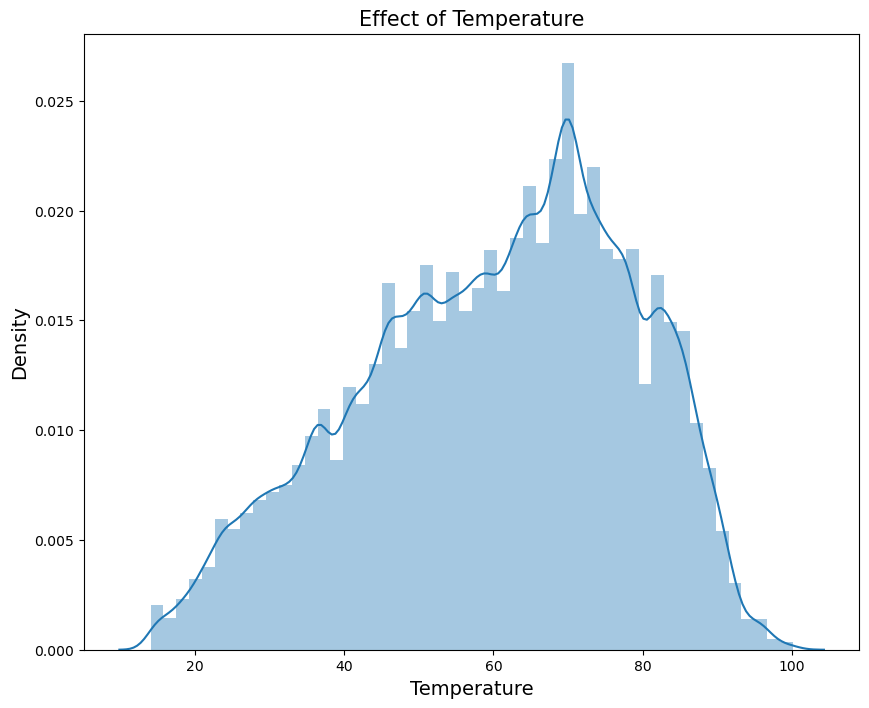

In [32]:
# Effect of Temperature on Sales
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

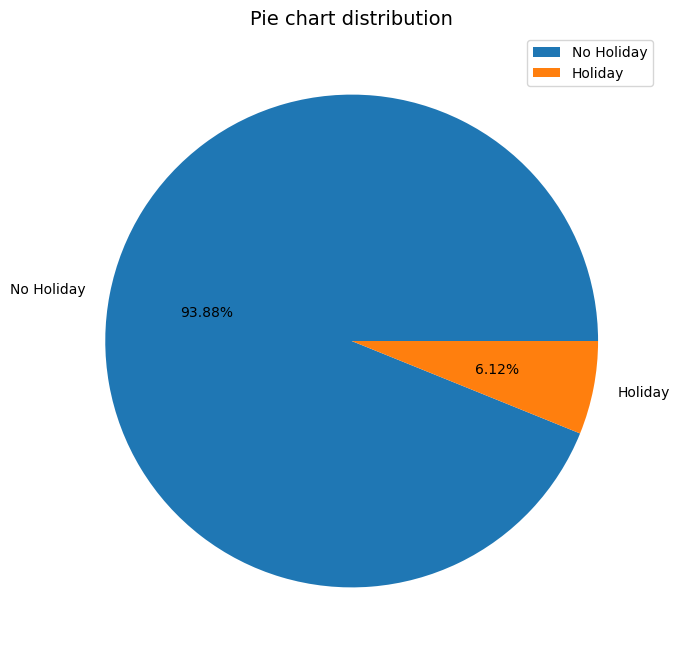

In [33]:
# Holiday Distribution
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show() 

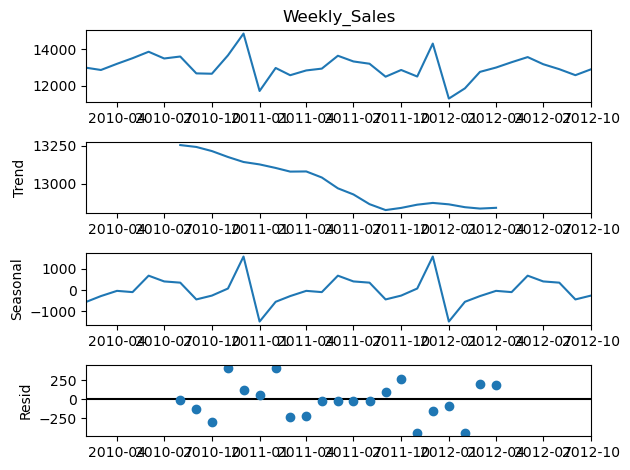

In [34]:
# Time Series Decompose
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

In [35]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [36]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [37]:
data = pd.concat([data, data_cat],axis=1)

In [38]:
data.drop(columns=cat_col,inplace=True)

In [39]:
data.drop(columns=['Date'],inplace=True)

In [40]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [41]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [42]:
data = normalization(data.copy(),num_col)

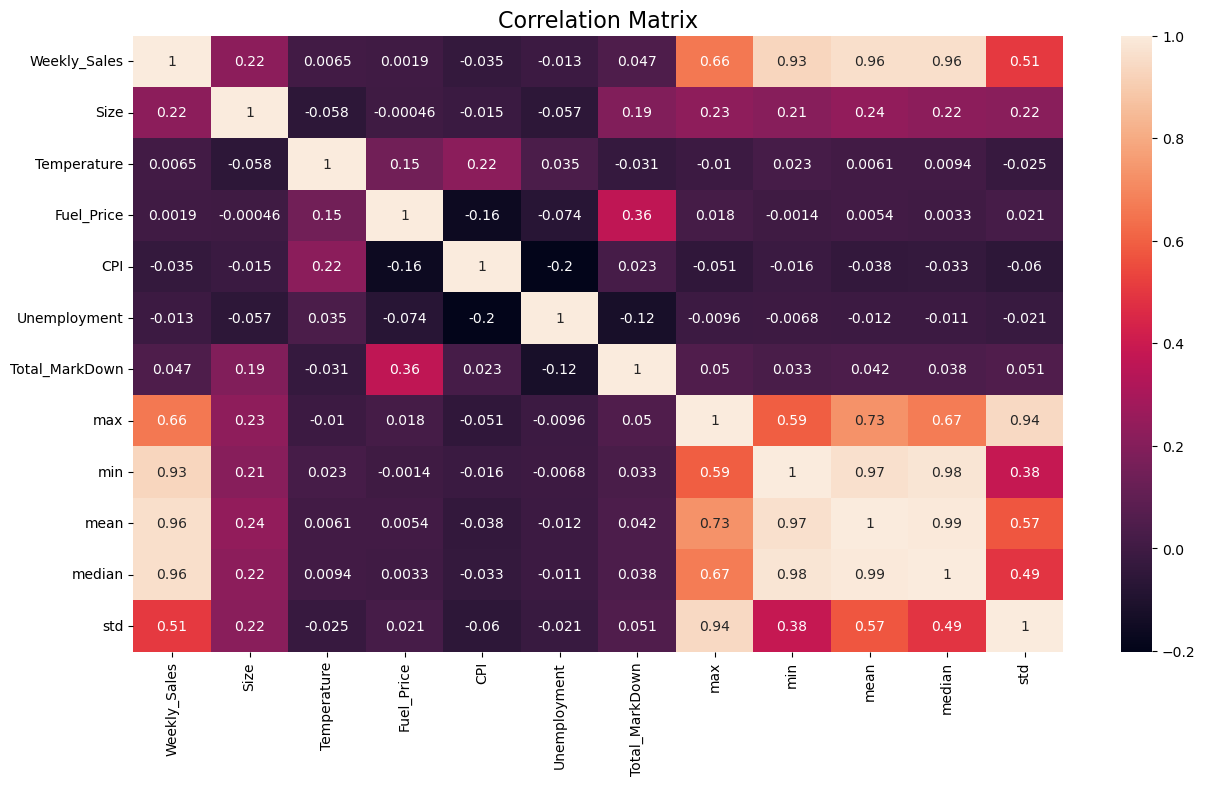

In [43]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('correlation_matrix.png')
plt.show()

In [44]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [45]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

C:\Users\haide\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [46]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,4.891411e-01
1,2,median,4.387927e-01
2,3,Week,1.965847e-02
3,4,Temperature,8.776659e-03
4,5,max,5.927174e-03
...,...,...,...
139,140,Dept_51,3.194120e-10
140,141,Dept_45,2.871526e-10
141,142,Dept_78,4.269644e-12
142,143,Dept_39,2.837488e-14


In [47]:
x=feature_rank.loc[0:25,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'std', 'Unemployment', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_3', 'Dept_18', 'IsHoliday', 'Size', 'Dept_11', 'Dept_9', 'Year', 'Dept_1', 'Dept_5', 'Dept_56', 'Dept_7', 'Dept_72', 'Dept_55']


In [48]:
X = data[x]
Y = data['Weekly_Sales']

In [49]:
data = pd.concat([X,Y],axis=1)

# Building the models
- Splitting data into train and test data

In [50]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

## 1. Linear Regression Model

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
linear_regression_accuracy = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",linear_regression_accuracy)

Linear Regressor Accuracy -  92.28379328908018


In [54]:
y_pred = lr.predict(X_test)

In [55]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030079215293536826
MSE 0.0034837903884710336
RMSE 0.059023642622859473
R2 0.9228379352983277


In [56]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.head()

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132118
2010-07-09,0.364278,0.280514
2011-07-01,0.005003,0.025738
2012-01-06,0.015856,0.015174
2011-08-26,0.000318,0.001827


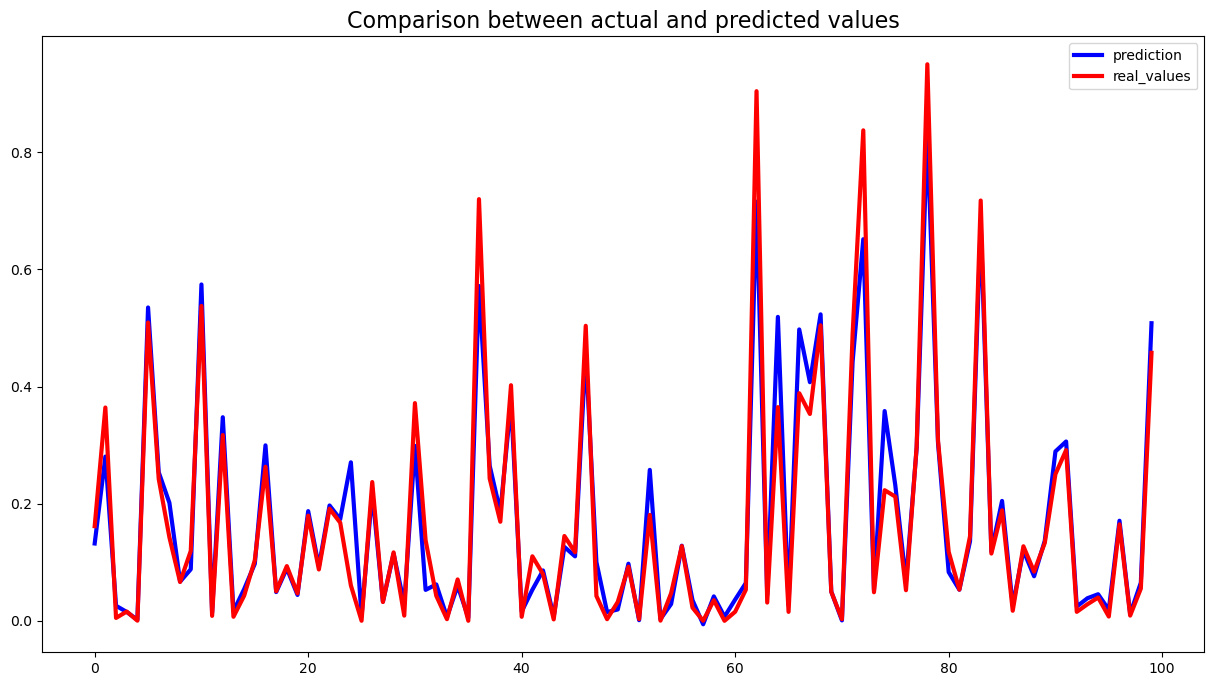

In [57]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(lr.predict(X_test[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
#plt.savefig('lr_real_pred.png')
plt.show()

## 2. Random Forest Regressor

In [58]:
rf = RandomForestRegressor()

In [59]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
random_forest_accuracy = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",random_forest_accuracy)

Random Forest Regressor Accuracy -  97.91175425601983


In [61]:
y_pred = rf.predict(X_test)

In [62]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015466080560611136
MSE 0.000942822130639423
RMSE 0.03070540881733091
R2 0.9791178653796564


In [63]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.head()

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.127417
2010-07-09,0.364278,0.325478
2011-07-01,0.005003,0.014887
2012-01-06,0.015856,0.019981
2011-08-26,0.000318,0.000592


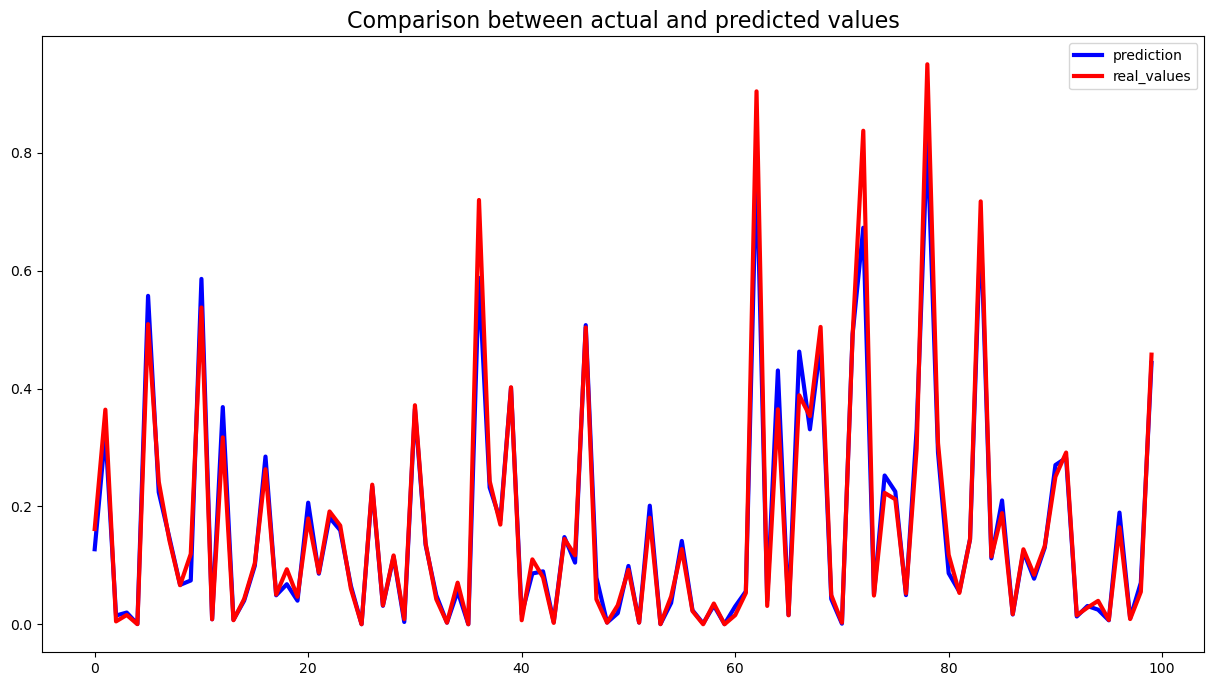

In [64]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(rf.predict(X_test[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.show()

# 3. KNN

In [65]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [66]:
knn_accuracy = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_accuracy)

KNeigbhbors Regressor Accuracy -  92.1435515526126


In [68]:
y_pred = knn.predict(X_test)

In [69]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.033150338631610654
MSE 0.003547108134077407
RMSE 0.059557603495082025
R2 0.9215859611622021


In [70]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.head()

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.112559
2010-07-09,0.364278,0.221307
2011-07-01,0.005003,0.011921
2012-01-06,0.015856,0.028551
2011-08-26,0.000318,0.001063


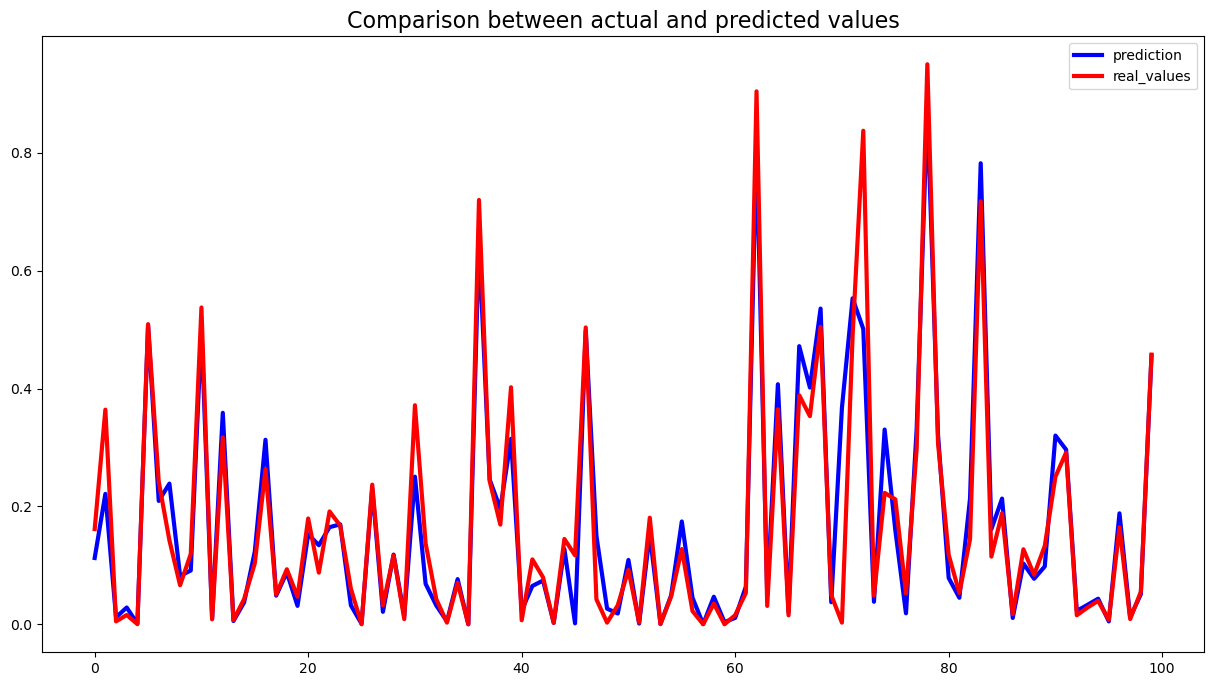

In [71]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(knn.predict(X_test[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
#plt.savefig('knn_real_pred.png')
plt.show()

# 4. XGBoost Regressor

In [72]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [73]:
xgboost_accuracy = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  97.3469562980422


In [74]:
y_pred = xgbr.predict(X_test)

In [75]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.019743153048336386
MSE 0.001197822776830769
RMSE 0.03460957637462165
R2 0.9734698969442169


In [76]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.head()

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.130563
2010-07-09,0.364278,0.313040
2011-07-01,0.005003,0.019386
2012-01-06,0.015856,0.021007
2011-08-26,0.000318,0.000722


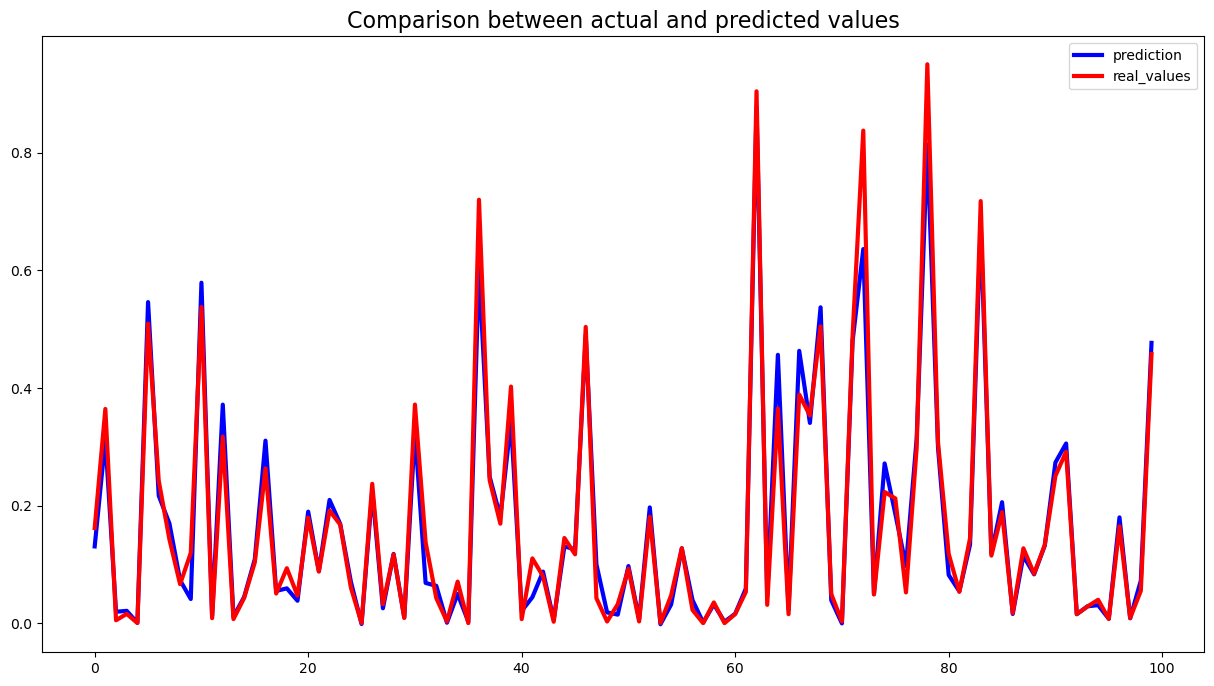

In [77]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(xgbr.predict(X_test[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
#plt.savefig('plots/xgb_real_pred.png')
plt.show()

# Comparing accuracy of models


In [78]:
acc = {'model':['linear_regression_accuracy','random_forest_accuracy','knn_accuracy','xgboost_accuracy'],'accuracy':[linear_regression_accuracy,random_forest_accuracy,knn_accuracy,xgboost_accuracy]}

In [79]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,linear_regression_accuracy,92.283793
1,random_forest_accuracy,97.911754
2,knn_accuracy,92.143552
3,xgboost_accuracy,97.346956


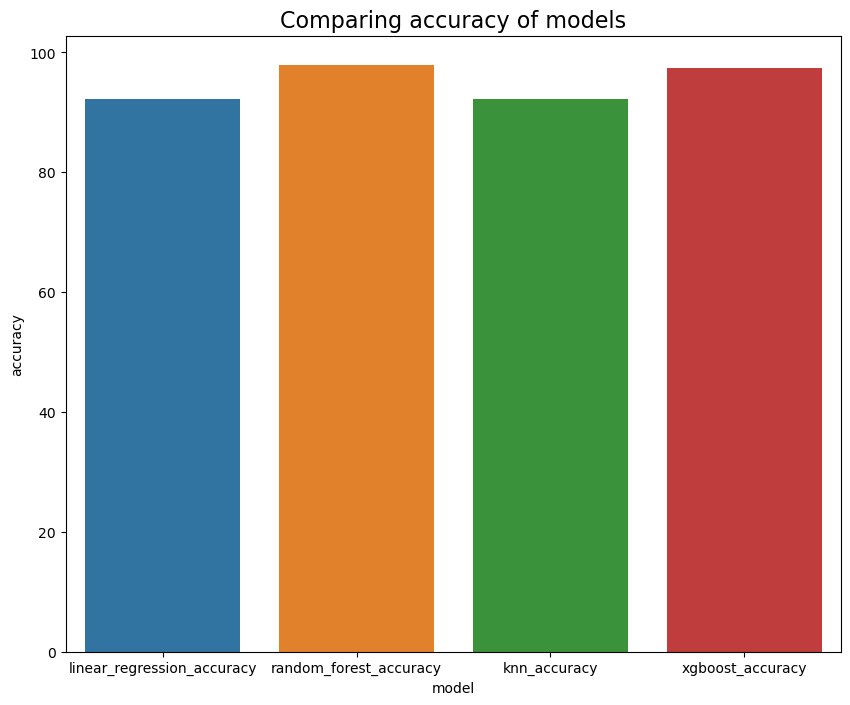

In [81]:
plt.figure(figsize=(10,8))
plt.title('Comparing accuracy of models',fontsize=16)
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.savefig('models_comparison.png')
plt.show()